In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util
import json
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm
from scipy import stats
from scipy.stats import ttest_1samp, ttest_rel, ttest_ind

In [2]:
username = 'britopereiraa'
client_id ='17a3ed14ab434b33b28f19f8bea3337d'
client_secret = '7f848f9d2a024b15be5fa776b4dc7a05'
redirect_uri = 'http://localhost:7777/callback'
scope = 'user-read-recently-played'

token = util.prompt_for_user_token(username=username, 
                                   scope=scope, 
                                   client_id=client_id,   
                                   client_secret=client_secret,     
                                   redirect_uri=redirect_uri)

In [4]:
credentials = json.load(open('authorization.json'))
client_id = credentials['client_id']
client_secret = credentials['client_secret']

#### OLD SONGS

In [37]:
#2016

playlist_index = 0

playlists = json.load(open('friends.json'))
playlist_uri = playlists[playlist_index]['uri']
test = playlists[playlist_index]['like']

client_credentials_manager = SpotifyClientCredentials(client_id=client_id,client_secret=client_secret)

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

uri = playlist_uri    # the URI is split by ':' to get the username and playlist ID
username = uri.split(':')[2]
playlist_id = uri.split(':')[4]

In [38]:
results = {'items':[]}

for n in range(0,3000,100):
    new = sp.user_playlist_tracks(username, playlist_id,  offset = n)
    results['items'] += new['items']
    
    playlist_tracks_data = results
    playlist_tracks_id = []
    playlist_tracks_titles = []
    playlist_tracks_artists = []
    
    for track in playlist_tracks_data['items']:
        playlist_tracks_id.append(track['track']['id'])
        playlist_tracks_titles.append(track['track']['name'])
        
    #adds a list of all artists involved in the song to the list of artists for the playlist
        for artist in track['track']['artists']:
            artist_list = []
            artist_list.append(artist['name'])
        playlist_tracks_artists.append(artist_list[0])
        
    
print(len(playlist_tracks_id))

old_df= pd.DataFrame([])
for i in range(0, len(playlist_tracks_id)):
    features = sp.audio_features(playlist_tracks_id[i])
    features_df = pd.DataFrame(features)
    old_df = old_df.append(features_df)

101


In [39]:
#Merging Dataframes for getting audio features and track information

old_df['title'] = playlist_tracks_titles
#features_df['first_artist'] = playlist_tracks_first_artists
old_df['main_artist'] = playlist_tracks_artists
#features_df = features_df.set_index('id')
old_df = old_df[['id', 'title', 'main_artist',
                           'danceability', 'energy', 'key', 'loudness',
                           'mode', 'acousticness', 'instrumentalness',
                           'liveness', 'valence', 'tempo',
                           'duration_ms', 'time_signature']]


old_df['playlist'] = 0
old_df.head()

,id,title,main_artist,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,playlist
0,0r4SsYcwvd8URat6AS2m6f,Lush Life,Zara Larsson,0.694,0.712,7,-3.923,0,0.1330,0.000000,0.2110,0.799,98.022,201122,4,0
0,27SdWb2rFzO6GWiYDBTD9j,Cheap Thrills,Sia,0.628,0.698,6,-5.608,0,0.0472,0.001430,0.0907,0.732,89.976,211667,4,0
0,4Zpe9VME8DiFjLdqSqPRoZ,Close,Tove Lo,0.625,0.615,6,-5.444,0,0.2490,0.000000,0.1400,0.394,124.044,234240,4,0
0,18AJRdgUoO9EYn11N7xzaT,Habits (Stay High),Tove Lo,0.733,0.650,5,-3.539,1,0.0703,0.000066,0.0829,0.348,110.003,209160,4,0
0,14WWzenpaEgQZlqPq2nk4v,Work,Drake,0.725,0.534,11,-6.238,1,0.0752,0.000000,0.0919,0.558,91.974,219320,4,0


#### NEW SONGS

In [40]:
#2019

playlist_index = 1
playlists = json.load(open('friends.json'))
playlist_uri = playlists[playlist_index]['uri']
test = playlists[playlist_index]['like']
client_credentials_manager = SpotifyClientCredentials(client_id=client_id,client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

uri = playlist_uri    # the URI is split by ':' to get the username and playlist ID
username = uri.split(':')[2]
playlist_id = uri.split(':')[4]


results = {'items':[]}

for n in range(0,3000,100):
    new = sp.user_playlist_tracks(username, playlist_id,  offset = n)
    results['items'] += new['items']
    
    playlist_tracks_data = results
    playlist_tracks_id = []
    playlist_tracks_titles = []
    playlist_tracks_artists = []
    
    for track in playlist_tracks_data['items']:
        playlist_tracks_id.append(track['track']['id'])
        playlist_tracks_titles.append(track['track']['name'])
        
    #adds a list of all artists involved in the song to the list of artists for the playlist
        for artist in track['track']['artists']:
            artist_list = []
            artist_list.append(artist['name'])
        playlist_tracks_artists.append(artist_list[0])
        
    
print(len(playlist_tracks_id))

new_df= pd.DataFrame([])
for i in range(0, len(playlist_tracks_id)):
    features = sp.audio_features(playlist_tracks_id[i])
    features_df = pd.DataFrame(features)
    new_df = new_df.append(features_df)

100


In [41]:
new_df['title'] = playlist_tracks_titles
new_df['main_artist'] = playlist_tracks_artists
new_df = new_df[['id', 'title', 'main_artist',
                           'danceability', 'energy', 'key', 'loudness',
                           'mode', 'acousticness', 'instrumentalness',
                           'liveness', 'valence', 'tempo',
                           'duration_ms', 'time_signature']]


new_df['playlist'] = 1
new_df.head()

,id,title,main_artist,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,playlist
0,6FDWCzWDsVyNuSf08t2UAn,Maddy La Nuit,Flavien Berger,0.760,0.336,8,-13.415,1,0.80600,0.504000,0.1180,0.5100,119.985,210400,4,1
0,7ARveOiD31w2Nq0n5FsSf8,Perfect Places,Lorde,0.622,0.580,1,-5.273,0,0.00241,0.000029,0.1120,0.5120,104.410,221874,4,1
0,4PlyCFOq2zRB7RBHq7AbVJ,Trésor,Flavien Berger,0.589,0.471,0,-9.438,1,0.56500,0.719000,0.0730,0.0601,123.042,370234,4,1
0,260V7huyJrXnyYe0dFv2Fa,Canopée,Polo & Pan,0.704,0.692,5,-6.558,0,0.09420,0.010900,0.0922,0.3690,96.005,276293,4,1
0,0Psz3az3RIYfJpnsajBT8N,Nanã,Polo & Pan,0.685,0.735,4,-6.337,0,0.19100,0.038000,0.1880,0.3850,94.035,190827,3,1


In [42]:
#FINAL DATAFRAME

frames = [old_df, new_df]

data = pd.concat(frames)

In [43]:
data.shape

(201, 16)

In [45]:
data

,id,title,main_artist,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,playlist
0,0r4SsYcwvd8URat6AS2m6f,Lush Life,Zara Larsson,0.694,0.712,7,-3.923,0,0.1330,0.000000,0.2110,0.799,98.022,201122,4,0
0,27SdWb2rFzO6GWiYDBTD9j,Cheap Thrills,Sia,0.628,0.698,6,-5.608,0,0.0472,0.001430,0.0907,0.732,89.976,211667,4,0
0,4Zpe9VME8DiFjLdqSqPRoZ,Close,Tove Lo,0.625,0.615,6,-5.444,0,0.2490,0.000000,0.1400,0.394,124.044,234240,4,0
0,18AJRdgUoO9EYn11N7xzaT,Habits (Stay High),Tove Lo,0.733,0.650,5,-3.539,1,0.0703,0.000066,0.0829,0.348,110.003,209160,4,0
0,14WWzenpaEgQZlqPq2nk4v,Work,Drake,0.725,0.534,11,-6.238,1,0.0752,0.000000,0.0919,0.558,91.974,219320,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,403vzOZN0tETDpvFipkNIL,Sisyphus,Andrew Bird,0.631,0.792,0,-4.364,0,0.2300,0.000317,0.0756,0.462,82.901,247493,4,1
0,628hP5ZZjXTz4AnIyDfDZ0,Desde Que O Samba É Samba,Gilberto Gil,0.618,0.153,2,-16.856,1,0.9280,0.005580,0.1340,0.324,136.361,308907,4,1
0,5oPN2dntsV2UM5ifrTGEC8,Everlasting Light,The Black Keys,0.775,0.579,4,-6.592,1,0.1240,0.019600,0.3660,0.731,90.461,204627,4,1
0,1v0ufp7FLTFcykUGOmFZKa,Daffodils (feat. Kevin Parker),Kevin Parker,0.723,0.539,0,-8.041,1,0.0412,0.013200,0.0343,0.283,108.946,298133,4,1


### Exploratory Data Analysis

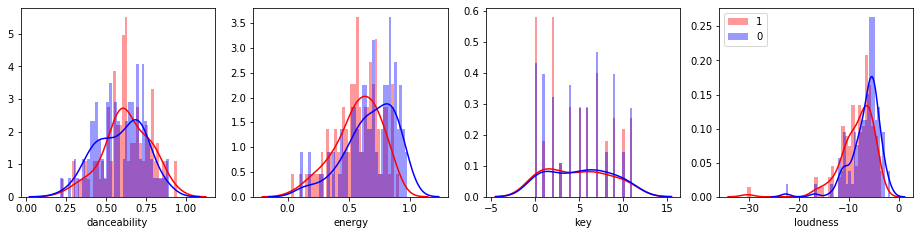

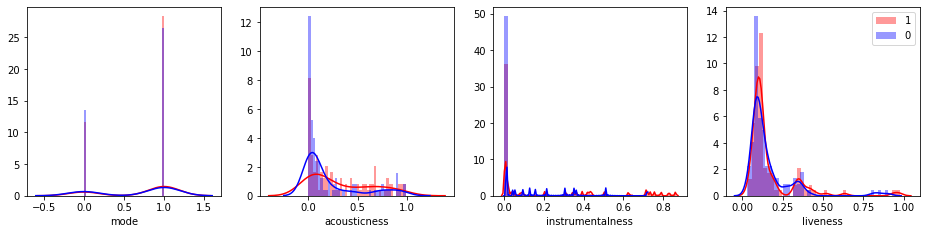

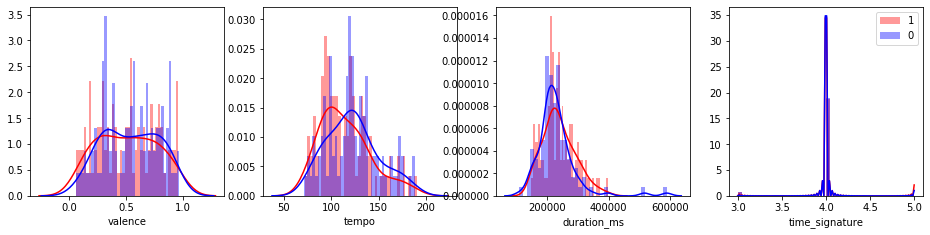

In [46]:
plt.figure(figsize=(16,16))
plt.subplot(4,4,1)

sns.distplot(data[data['playlist']==1]['danceability'], color='red', bins=40)
sns.distplot(data[data['playlist']==0]['danceability'], color='blue', bins=40)
plt.subplot(4,4,2)
sns.distplot(data[data['playlist']==1]['energy'], color='red', bins=40)
sns.distplot(data[data['playlist']==0]['energy'], color='blue', bins=40)
plt.subplot(4,4,3)
sns.distplot(data[data['playlist']==1]['key'], color='red', bins=40)
sns.distplot(data[data['playlist']==0]['key'], color='blue', bins=40)
plt.subplot(4,4,4)
sns.distplot(data[data['playlist']==1]['loudness'], color='red', bins=40)
sns.distplot(data[data['playlist']==0]['loudness'], color='blue', bins=40)
plt.legend((1,0))

plt.figure(figsize=(16,16))
plt.subplot(4,4,1)
sns.distplot(data[data['playlist']==1]['mode'], color='red', bins=40)
sns.distplot(data[data['playlist']==0]['mode'], color='blue', bins=40)
plt.subplot(4,4,2)
sns.distplot(data[data['playlist']==1]['acousticness'], color='red', bins=40)
sns.distplot(data[data['playlist']==0]['acousticness'], color='blue', bins=40)
plt.subplot(4,4,3)
sns.distplot(data[data['playlist']==1]['instrumentalness'], color='red', bins=40)
sns.distplot(data[data['playlist']==0]['instrumentalness'], color='blue', bins=40)
plt.subplot(4,4,4)
sns.distplot(data[data['playlist']==1]['liveness'], color='red', bins=40)
sns.distplot(data[data['playlist']==0]['liveness'], color='blue', bins=40)
plt.legend((1,0))


plt.figure(figsize=(16,16))
plt.subplot(4,4,1)
sns.distplot(data[data['playlist']==1]['valence'], color='red', bins=40)
sns.distplot(data[data['playlist']==0]['valence'], color='blue', bins=40)
plt.subplot(4,4,2)
sns.distplot(data[data['playlist']==1]['tempo'], color='red', bins=40)
sns.distplot(data[data['playlist']==0]['tempo'], color='blue', bins=40)
plt.subplot(4,4,3)
sns.distplot(data[data['playlist']==1]['duration_ms'], color='red', bins=40)
sns.distplot(data[data['playlist']==0]['duration_ms'], color='blue', bins=40)
plt.subplot(4,4,4)
sns.distplot(data[data['playlist']==1]['time_signature'], color='red', bins=40)
sns.distplot(data[data['playlist']==0]['time_signature'], color='blue', bins=40)
plt.legend((1,0))